In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pylab as pl


In [2]:
# Read in our data set
df = pd.read_csv("Dataset.csv")

In [3]:
# Separate the sentiment into its own columns
df[['neg','neu', 'pos', 'compound']] = df.Sentiment.str.split(",",expand=True)

# Drop sentinment, we dont need it anymore
df = df.drop(['Sentiment'], axis=1);

In [4]:
# Clean up the extraneous parts of the strings
def just_digits(label):
    numbers = re.compile('\d+(?:\.\d+)?')
    return numbers.findall(label)[0]

df['neg'] = df['neg'].apply(just_digits).astype(float);
df['neu'] = df['neu'].apply(just_digits).astype(float);
df['pos'] = df['pos'].apply(just_digits).astype(float);
df['compound'] = df['compound'].apply(just_digits).astype(float);


In [26]:
# drop rows where all values are 0
df = df[(df[['neg', 'neu', 'pos', 'compound']] != 0).any(axis=1)]

## Data Compression

In [74]:
# Split the data to just dataframes per news source
df_CNN_Trump = df.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == 'Trump') ]
df_Breitbart_Trump = df.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == 'Trump')]
df_NYT_Trump = df.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == 'Trump')]


# The smallest seems to be breitbart so we will save the num articles
smallestArticleCountTrump = df_Breitbart_Trump.shape[0]

# Do the same but for Hillary
df_CNN_Hillary = df.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == 'Hillary') ]
df_Breitbart_Hillary = df.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == 'Hillary')]
df_NYT_Hillary = df.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == 'Hillary')]


# The smallest seems to be breitbart so we will save the num articles
smallestArticleCountHillary = df_Breitbart_Hillary.shape[0]


In [63]:
# This function will, given a dataframe in our format, and a desired group size (how many to average per entry), 
# It will create a condensed dataframe that is of size (dataframe.rowsize / groupSize)
def condenseDataframe(dataframe, groupSize):
    condensedNeg = []
    condensedNeu = []
    condensedPos = []
    condensedCompound = []
    condensedNewsSource = []
    condensedCandidate = []

    currNegSum = 0
    currNeuSum = 0
    currPosSum = 0
    currCompSum = 0
    currNewsSource = ""
    currCandidate = ""
    count = 0

    for index, row in dataframe.iterrows():
        currNegSum += row['neg']
        currNeuSum += row['neu']
        currPosSum += row['pos']
        currCompSum += row['compound']
        currCandidate = row['Candidate']
        currNewsSource = row['News_Source']
        count += 1

        # Check if we have reached that group size
        if(count == groupSize):
            # Find the averages and reset the sums
            condensedNeg.append(currNegSum / groupSize)
            condensedNeu.append(currNeuSum / groupSize)
            condensedPos.append(currPosSum / groupSize)
            condensedCompound.append(currCompSum / groupSize)
            condensedNewsSource.append(currNewsSource)
            condensedCandidate.append(currCandidate)

            currNegSum = 0
            currNeuSum = 0
            currPosSum = 0
            currCompSum = 0
            count = 0

    # grab the rest of the sums and add it to the lists
    condensedNeg.append(currNegSum / count)
    condensedNeu.append(currNeuSum / count)
    condensedPos.append(currPosSum / count)
    condensedCompound.append(currCompSum / count)
    condensedNewsSource.append(currNewsSource)
    condensedCandidate.append(currCandidate)
                        
    # Put all of this data into a dataframe
    return(pd.DataFrame({'News_Source': condensedNewsSource, 'Candidate': condensedCandidate, 'neg': condensedNeg, 'neu':condensedNeu, 'pos': condensedPos, 'compound': condensedCompound}))

In [67]:
# To do this, we will grab the sizes of each dataframe, and divide it by the smallestArticleCount.

cnnGroupSizeT = int(df_CNN_Trump.shape[0] / smallestArticleCountTrump)
nytGroupSizeT = int(df_NYT_Trump.shape[0] / smallestArticleCountTrump)
cnnGroupSizeH = int(df_CNN_Trump.shape[0] / smallestArticleCountHillary)
nytGroupSizeH = int(df_NYT_Trump.shape[0] / smallestArticleCountHillary)

# Condense our data
df_CNN_Trump_condensed = condenseDataframe(df_CNN_Trump, cnnGroupSizeT)
df_NYT_Trump_condensed = condenseDataframe(df_NYT_Trump, nytGroupSizeT)
df_CNN_Hillary_condensed = condenseDataframe(df_CNN_Hillary, cnnGroupSizeH)
df_NYT_Hillary_condensed = condenseDataframe(df_NYT_Hillary, nytGroupSizeH)

In [73]:
# Next step is to merge them back together,  Now we can used df_condensed
df_condensed = df_CNN_Trump_condensed.append(df_Breitbart_Trump, ignore_index = True).append(df_NYT_Trump_condensed, ignore_index = True).append(df_CNN_Hillary_condensed, ignore_index = True).append(df_Breitbart_Hillary, ignore_index = True).append(df_NYT_Hillary_condensed, ignore_index = True)

# Data Visualization
Now that we have our data, let us just visualize it.  This will be split up into two sections, Trump and Clinton.  And each section will have a histogram of negative, positive, and neutral sentiment data for each news source for that candidate

## Trump Sentiment Analysis

### CNN Articles

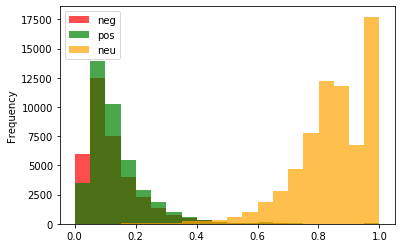

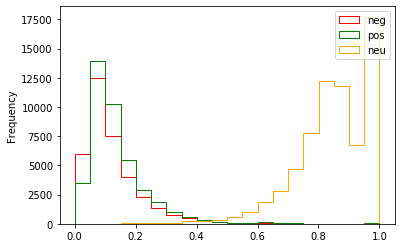

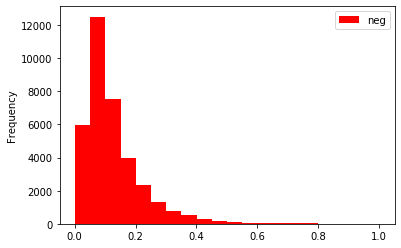

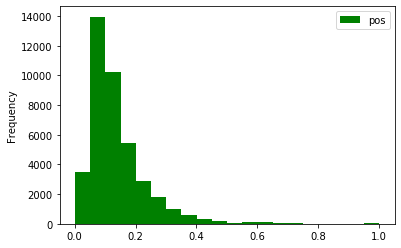

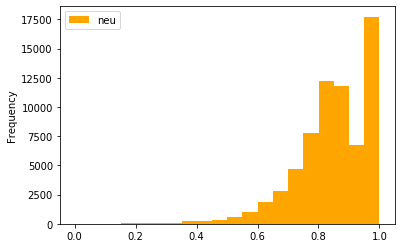

In [6]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7,color=['red','green',"orange"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green","orange"], histtype='step')
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["orange"])

### Breitbart Articles

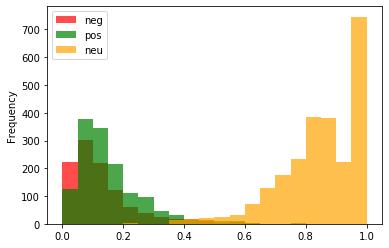

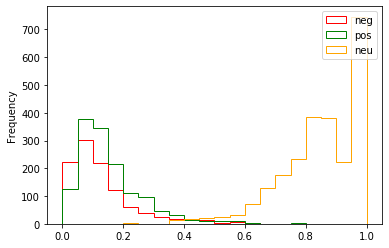

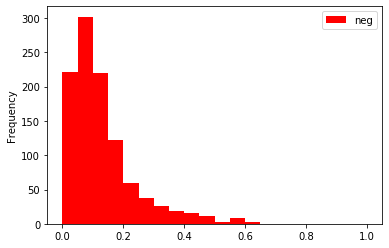

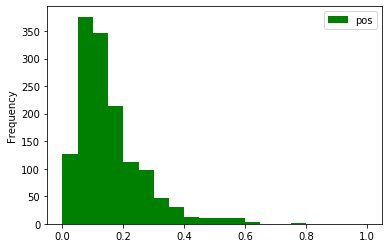

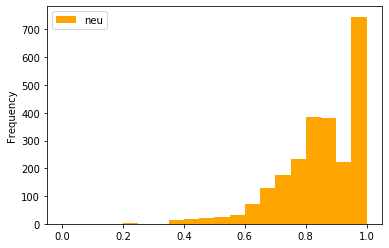

In [7]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=['red','green',"orange"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green","orange"], histtype='step')
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["orange"])

### New York Times Articles

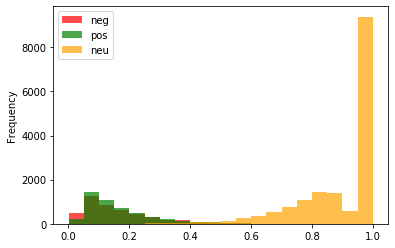

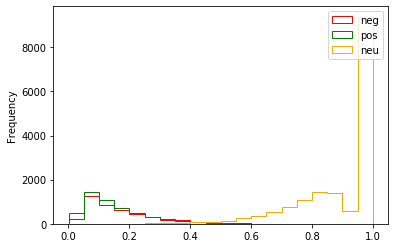

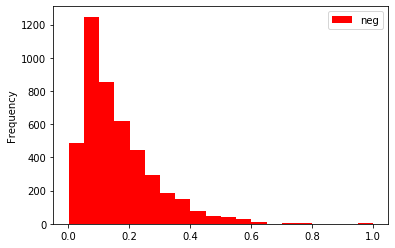

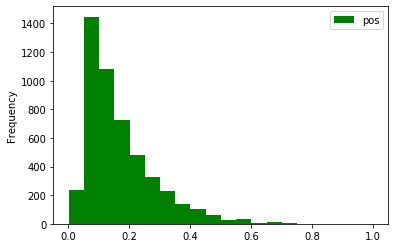

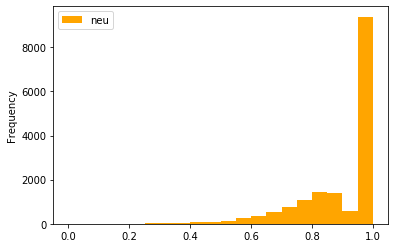

In [8]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=['red','green',"orange"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green","orange"], histtype='step')
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["orange"])

## Clinton Sentiment Analysis

### CNN Articles

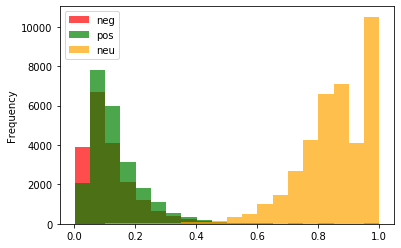

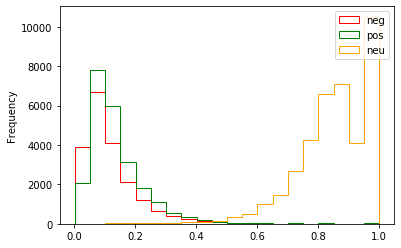

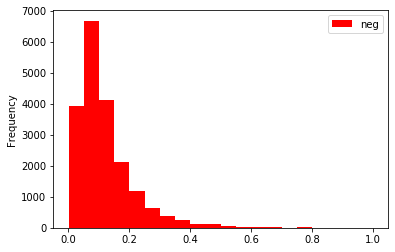

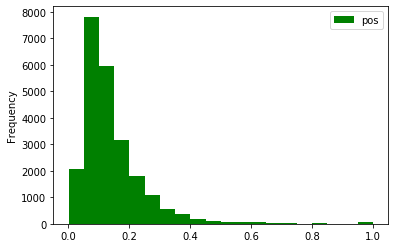

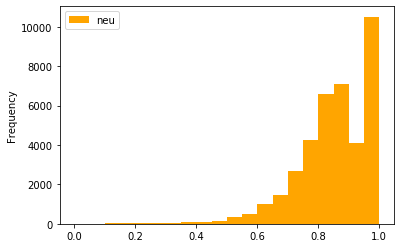

In [9]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green","orange"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green","orange"], histtype='step')
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["orange"])

### Breitbart Articles

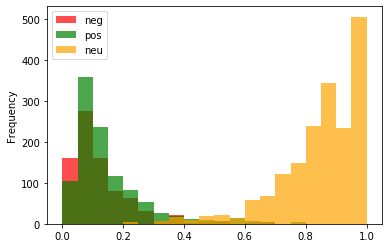

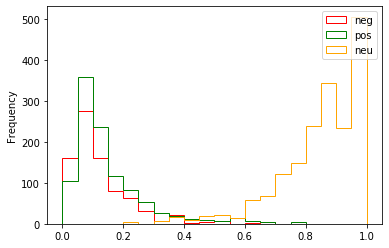

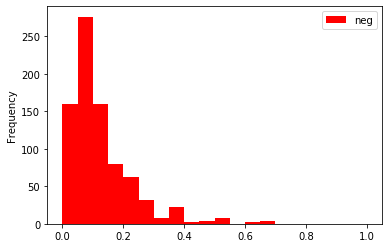

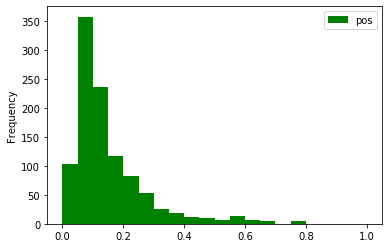

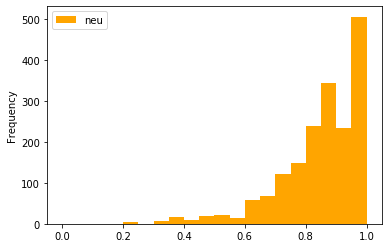

In [10]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green","orange"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green","orange"], histtype='step')
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["orange"])

### New York Times Articles

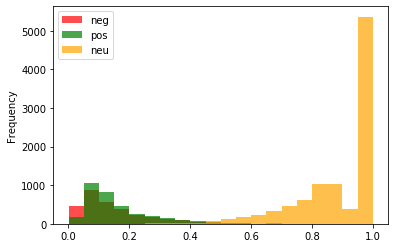

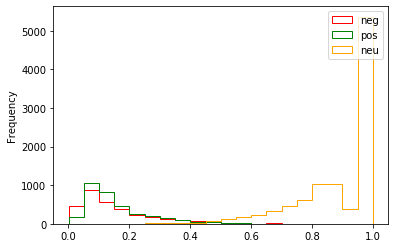

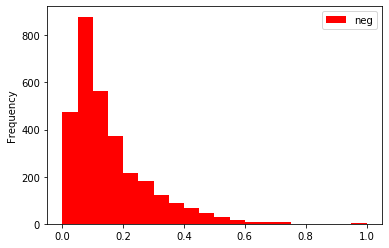

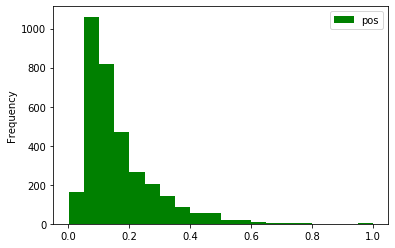

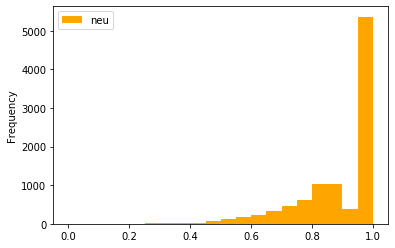

In [11]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7,  color=["red","green","orange"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green","orange"], histtype='step')
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["orange"])

# Less Neutral Article Visualization

So, given this data set, there were high amounts of 0's for neg/pos sentiment because there were a high amount of articles that were neutral
So, lets look at the data again, but this time remove all articles that were neutral. This data set will show us the sentiment for articles that were not completely neutral based on a threshold of 0.8

In [12]:
df_noNeu = df.loc[(df['neu'] < 0.8)]

# Trump Sentiment Analysis

### CNN Articles

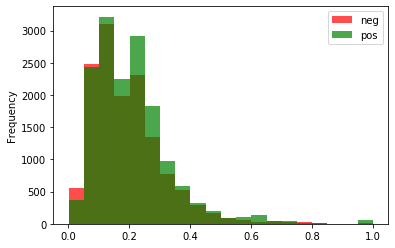

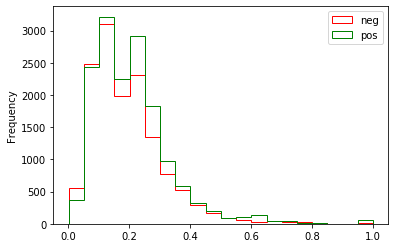

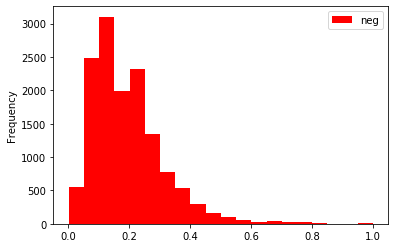

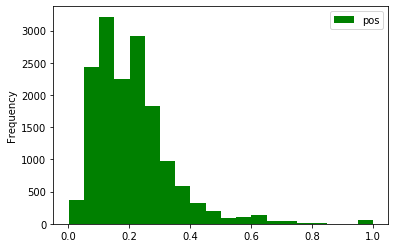

In [13]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

### Breitbart Articles

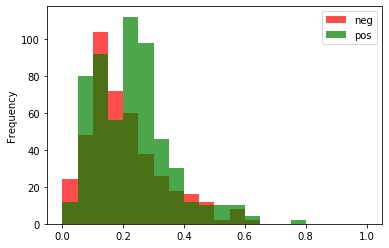

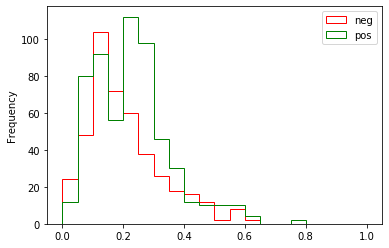

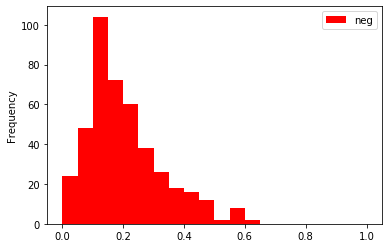

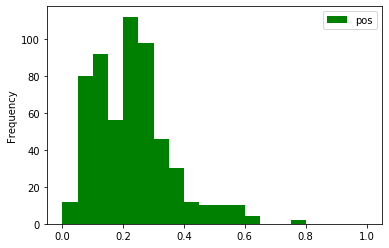

In [14]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

### New York Times Articles

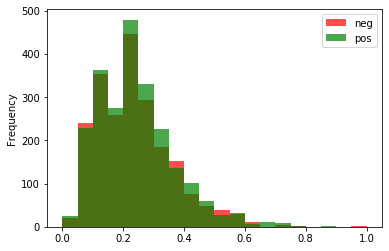

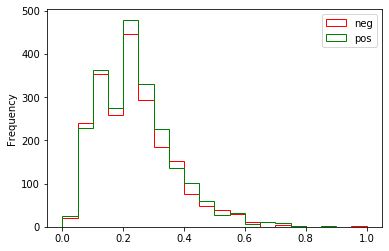

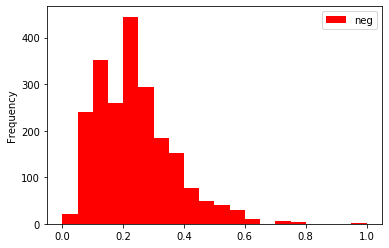

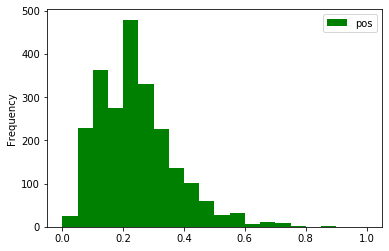

In [15]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

# Clinton Sentiment Analysis

### CNN Articles

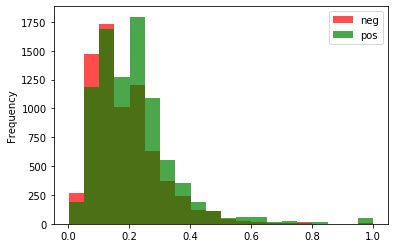

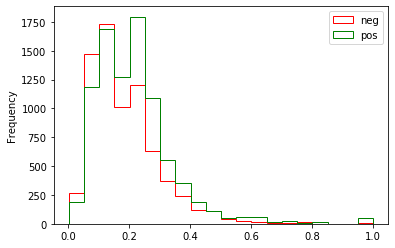

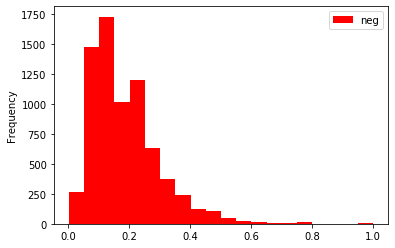

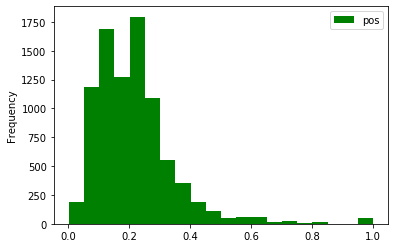

In [16]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

### Breitbart Articles

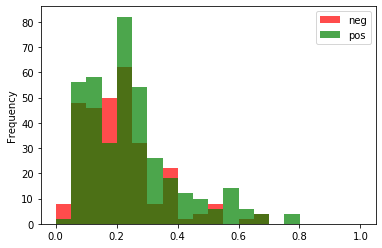

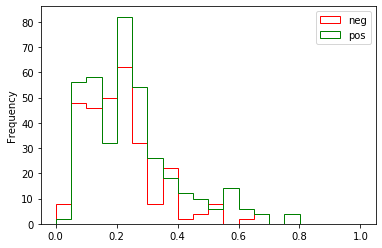

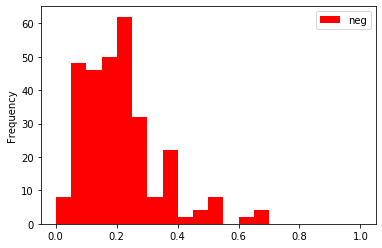

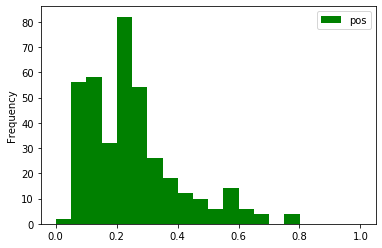

In [17]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

### New York Times Articles

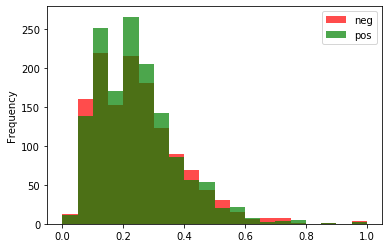

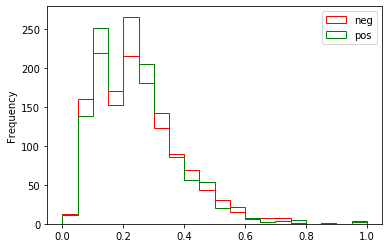

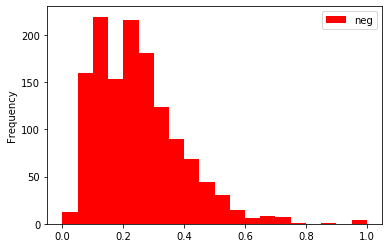

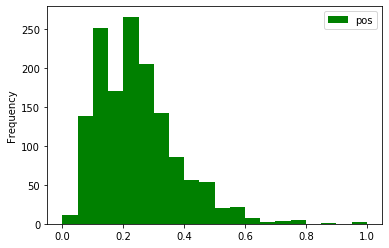

In [18]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

# Little Neutral Article Visualization

Just for fun, we will do the same thing, but with an even lower neutral threshold of 0.5, just to visualize the data for the sentimentally charged articles

In [19]:
df_noNeu = df.loc[(df['neu'] < 0.5)]

# Trump Sentiment Analysis

### CNN Articles

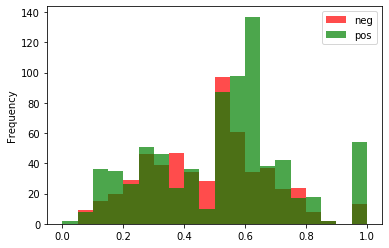

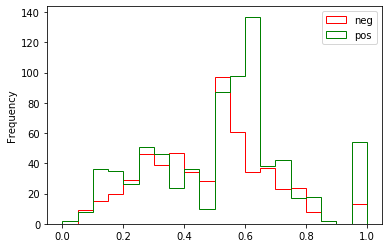

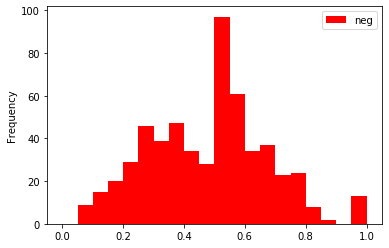

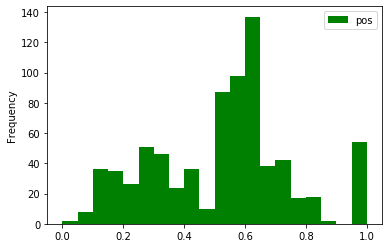

In [20]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

### Breitbart Articles

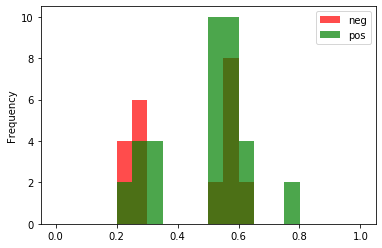

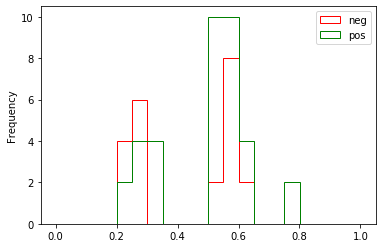

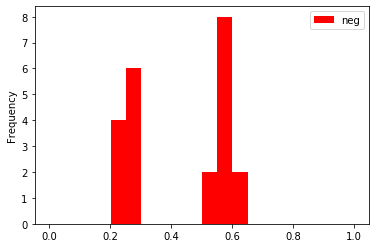

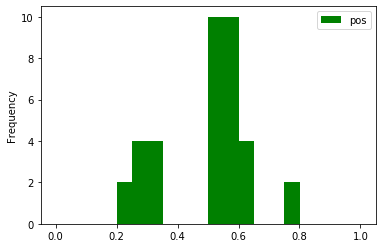

In [21]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

### New York Times Articles

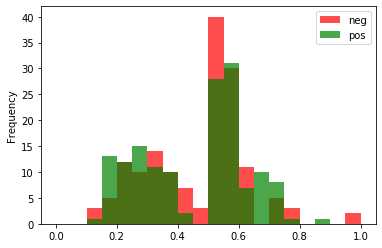

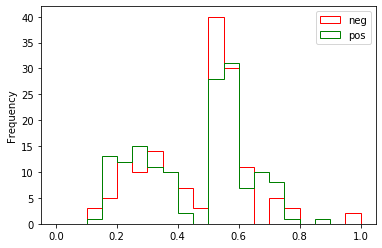

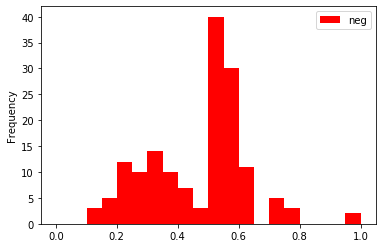

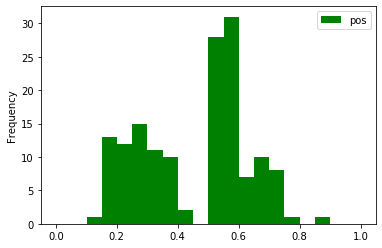

In [22]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

# Clinton Sentiment Analysis

### CNN Articles

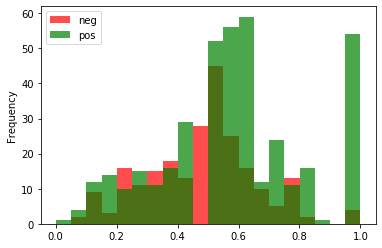

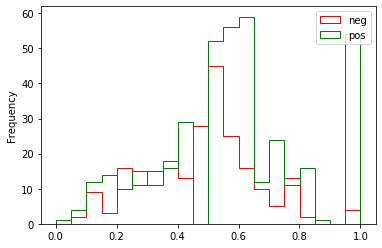

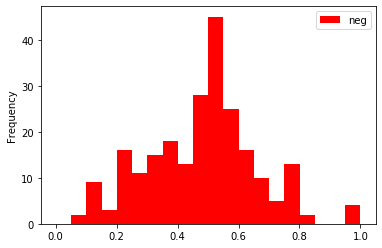

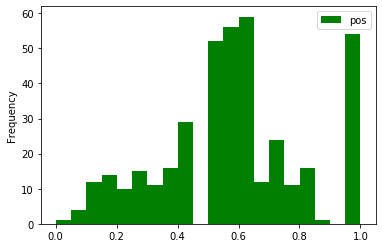

In [23]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

### Breitbart Articles

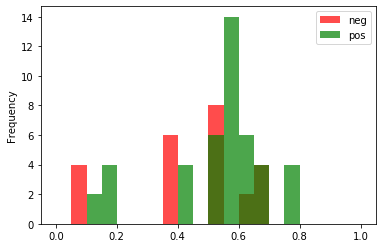

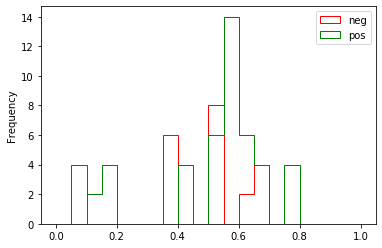

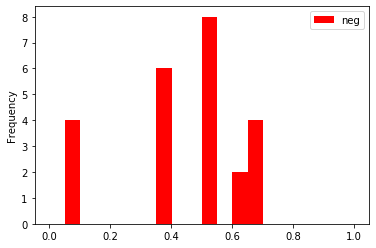

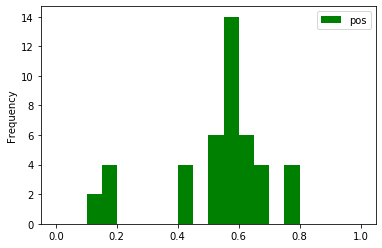

In [24]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])

### New York Times Articles

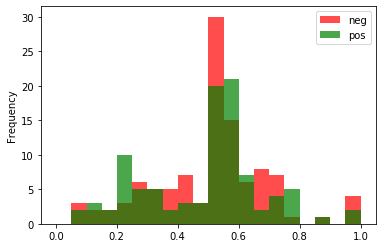

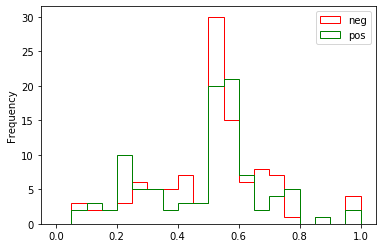

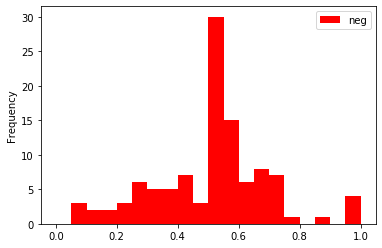

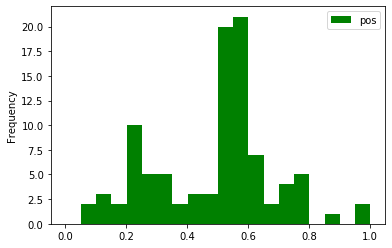

In [25]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","green"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), color=["red","green"], histtype='step')
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"])
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["green"])